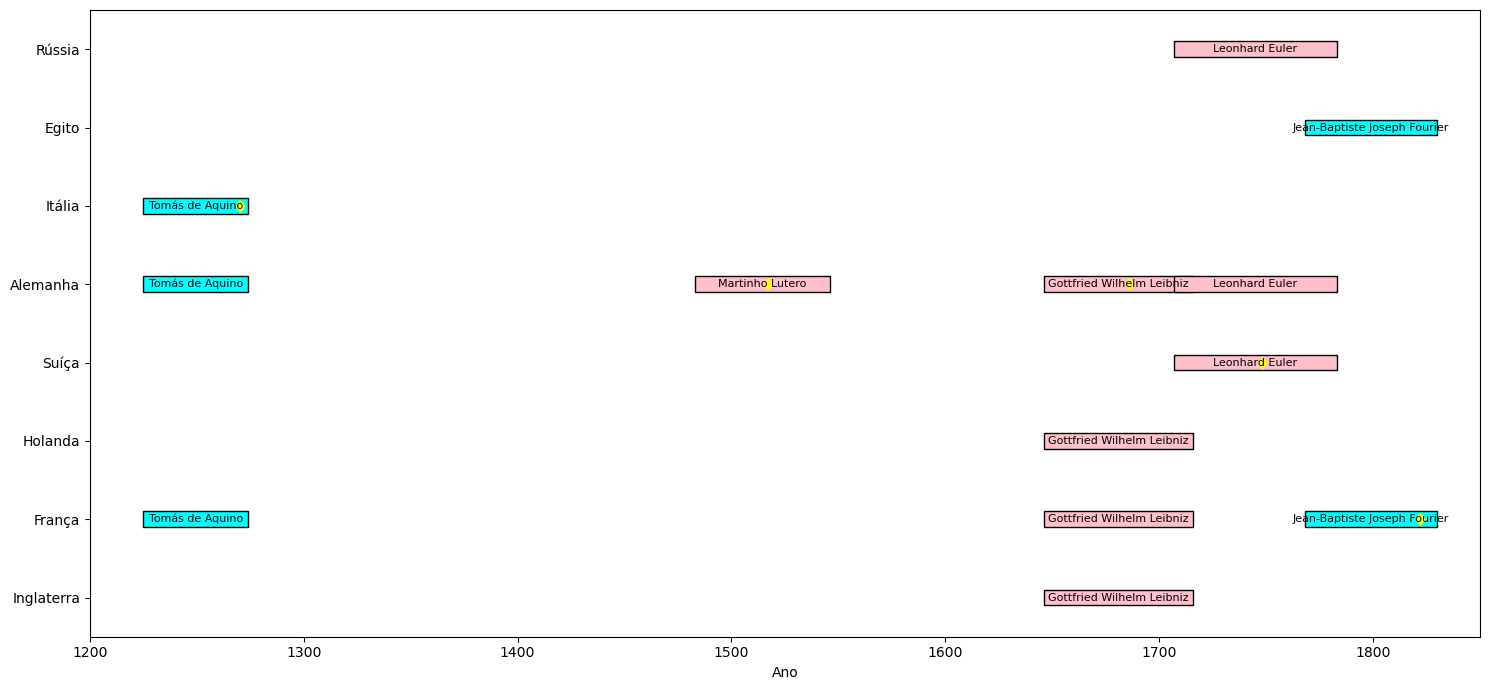

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dados para a linha do tempo, incluindo países onde morou, religião e idade da obra mais relevante
dados = {
    "Tomás de Aquino": (1225, 1274, "Itália", ["Itália", "França", "Alemanha"], "católico", 45),
    "Martinho Lutero": (1483, 1546, "Alemanha", ["Alemanha"], "protestante", 34),
    "Gottfried Wilhelm Leibniz": (1646, 1716, "Alemanha", ["Alemanha", "França", "Inglaterra", "Holanda"], "protestante", 40),
    "Leonhard Euler": (1707, 1783, "Suíça", ["Suíça", "Rússia", "Alemanha"], "protestante", 41),
    "Jean-Baptiste Joseph Fourier": (1768, 1830, "França", ["França", "Egito"], "católico", 54)
}

# Criando um conjunto de países únicos
paises = set()
for _, _, _, paises_morou, _, _ in dados.values():
    paises.update(paises_morou)

# Ordenando os países geograficamente (aproximado, do ocidente para o oriente)
# Usando a longitude aproximada de cada país como referência
longitudes_aproximadas = {
    "Itália": 12.5,
    "França": 2.5,
    "Alemanha": 10.0,
    "Suíça": 8.0,
    "Inglaterra": 0.0,
    "Holanda": 5.0,
    "Rússia": 37.5,
    "Egito": 30.0
}
paises_ordenados = sorted(list(paises), key=lambda pais: longitudes_aproximadas.get(pais, 0))

# Criando um dicionário que mapeia cada país ao seu índice numérico
mapeamento_paises = {pais: i for i, pais in enumerate(paises_ordenados)}

# Função para definir a cor com base na religião
def cor_religiao(religiao):
    if religiao == "católico":
        return "cyan"
    elif religiao == "protestante":
        return "pink"
    else:
        return "gray"

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 7))

# Configurando a linha do tempo
ax.set_xlim(1200, 1850)
ax.set_ylim(0, len(paises))
# ax.axhline(0.5, color="black", linewidth=0.5)
ax.set_xlabel("Ano")

# Adicionando os itens à linha do tempo
for i, (nome, (inicio, fim, pais_nascimento, paises_morou, religiao, idade_obra)) in enumerate(dados.items()):
    # Calculando a posição e largura do retângulo
    x = inicio  # Posição x da barra: ano de início
    largura = fim - inicio  # Largura da barra: diferença entre o ano de início e fim
    altura = 0.2

    # Criando um retângulo para cada país onde o personagem morou
    for pais in paises_morou:
        y = mapeamento_paises[pais] + 0.5
        retangulo = patches.Rectangle((x, y - altura / 2), largura, altura,
                                      facecolor=cor_religiao(religiao), edgecolor="black")
        ax.add_patch(retangulo)

        # Adicionando o texto em cada retângulo
        ax.text(x + largura / 2, y, nome, ha="center", va="center", fontsize=8)

    # Adicionando o marcador da idade da obra no país de nascimento
    idade_obra_x = inicio + idade_obra
    y_nascimento = mapeamento_paises[pais_nascimento] + 0.5
    ax.plot(idade_obra_x, y_nascimento, marker="d", color="yellow")

# Calculando a posição vertical média das barras de cada país
posicoes_medias_paises = {}
for pais in paises_ordenados:
    posicoes = [mapeamento_paises[p] + 0.5 for _, _, _, p_morou, _, _ in dados.values() for p in p_morou if p == pais]
    posicoes_medias_paises[pais] = sum(posicoes) / len(posicoes) if posicoes else 0

# Define as posições dos ticks no eixo y usando as posições médias calculadas
ax.set_yticks([posicoes_medias_paises[pais] for pais in paises_ordenados])
ax.set_yticklabels(paises_ordenados)

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

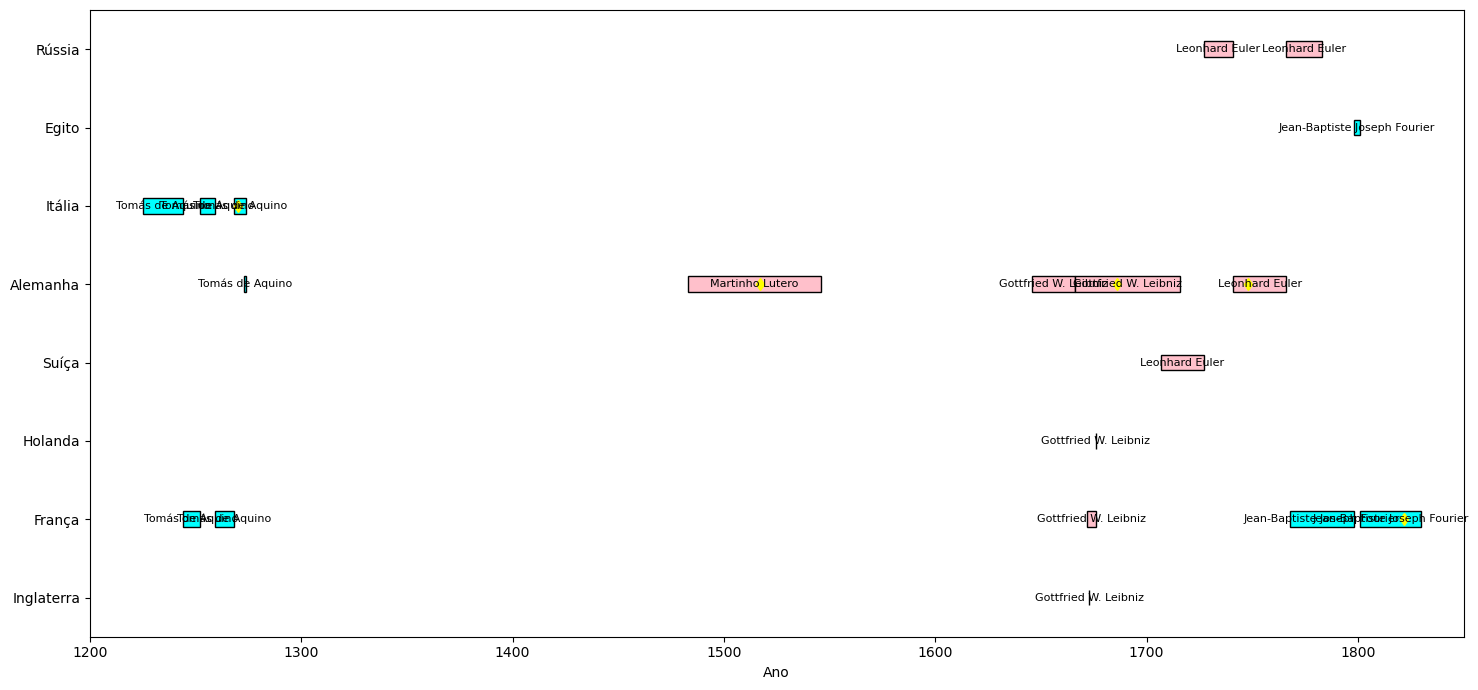

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dados para a linha do tempo, incluindo países onde morou, religião,
# idade da obra mais relevante, país da obra e períodos aproximados em cada país
dados = {
    "Tomás de Aquino": (1225, 1274, "Itália",
                         [("Itália", 1225, 1244), ("França", 1244, 1252), ("Itália", 1252, 1259),
                          ("França", 1259, 1268), ("Itália", 1268, 1274), ("Alemanha", 1273, 1274)],
                         "católico", 45, "Itália"),  # Obra publicada na Itália
    "Martinho Lutero": (1483, 1546, "Alemanha", [("Alemanha", 1483, 1546)], "protestante", 34, "Alemanha"),  # Obra publicada na Alemanha
    "Gottfried W. Leibniz": (1646, 1716, "Alemanha",
                                   [("Alemanha", 1646, 1666), ("França", 1672, 1676),
                                    ("Alemanha", 1666, 1716), ("Inglaterra", 1673, 1673),
                                    ("Holanda", 1676, 1676)],
                                   "protestante", 40, "Alemanha"),  # Obra publicada na Alemanha
    "Leonhard Euler": (1707, 1783, "Suíça",
                       [("Suíça", 1707, 1727), ("Rússia", 1727, 1741), ("Alemanha", 1741, 1766),
                        ("Rússia", 1766, 1783)],
                       "protestante", 41, "Alemanha"),  # Obra publicada na Alemanha
    "Jean-Baptiste Joseph Fourier": (1768, 1830, "França",
                                     [("França", 1768, 1798), ("Egito", 1798, 1801),
                                      ("França", 1801, 1830)],
                                     "católico", 54, "França")  # Obra publicada na França
}

# Criando um conjunto de países únicos
paises = set()
for _, _, _, paises_morou, _, _, _ in dados.values():
    paises.update([pais for pais, _, _ in paises_morou])

# Ordenando os países geograficamente (aproximado, do ocidente para o oriente)
# Usando a longitude aproximada de cada país como referência
longitudes_aproximadas = {
    "Itália": 12.5,
    "França": 2.5,
    "Alemanha": 10.0,
    "Suíça": 8.0,
    "Inglaterra": 0.0,
    "Holanda": 5.0,
    "Rússia": 37.5,
    "Egito": 30.0
}
paises_ordenados = sorted(list(paises), key=lambda pais: longitudes_aproximadas.get(pais, 0))

# Criando um dicionário que mapeia cada país ao seu índice numérico
mapeamento_paises = {pais: i for i, pais in enumerate(paises_ordenados)}

# Função para definir a cor com base na religião
def cor_religiao(religiao):
    if religiao == "católico":
        return "cyan"
    elif religiao == "protestante":
        return "pink"
    else:
        return "gray"

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 7))

# Configurando a linha do tempo
ax.set_xlim(1200, 1850)
ax.set_ylim(0, len(paises))
# ax.axhline(0.5, color="black", linewidth=0.5)
ax.set_xlabel("Ano")

# Adicionando os itens à linha do tempo
for i, (nome, (inicio_vida, fim_vida, _, paises_morou, religiao, idade_obra, pais_obra)) in enumerate(dados.items()):
    # Criando um retângulo para cada país onde o personagem morou
    for pais, inicio, fim in paises_morou:
        x = inicio
        largura = fim - inicio
        y = mapeamento_paises[pais] + 0.5
        altura = 0.2
        retangulo = patches.Rectangle((x, y - altura / 2), largura, altura,
                                      facecolor=cor_religiao(religiao), edgecolor="black")
        ax.add_patch(retangulo)

        # Adicionando o texto em cada retângulo
        ax.text(x + largura / 2, y, nome, ha="center", va="center", fontsize=8)

    # Adicionando o marcador da idade da obra no país correto
    idade_obra_x = inicio_vida + idade_obra
    y_obra = mapeamento_paises[pais_obra] + 0.5
    ax.plot(idade_obra_x, y_obra, marker="d", color="yellow")

# Calculando a posição vertical média das barras de cada país
posicoes_medias_paises = {}
for pais in paises_ordenados:
    posicoes = [mapeamento_paises[p] + 0.5 for _, _, _, p_morou, _, _, _ in dados.values() for p, _, _ in p_morou if p == pais]
    posicoes_medias_paises[pais] = sum(posicoes) / len(posicoes) if posicoes else 0

# Define as posições dos ticks no eixo y usando as posições médias calculadas
ax.set_yticks([posicoes_medias_paises[pais] for pais in paises_ordenados])
ax.set_yticklabels(paises_ordenados)

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()